In [ ]:
%pip install --upgrade xarray numpy matplotlib pandas seaborn pingouin

In [1]:
# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import external packages
import xarray as xr
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt

# Add path with self-created packages and import them
import sys
sys.path.append('./src')
import sciebo

# Pupil Position Analysis with Pandas and Pingouin
In the experiments reported by [Steinmetz et al, 2019 in Nature](https://www.nature.com/articles/s41586-019-1787-x), mice performed a discrimination task where they moved the position of a stimulus using a steering wheel. During the experiment, a camera recorded the pupil position of the subject in the x and y directions.

##### Analysis Goals
In this notebook we will be analyzing the pupil position with statistical tests.

##### Learning Goals
We will explore the [**pingouin**](https://pingouin-stats.org/build/html/index.html) Python package to perform statistical tests like correlation analysis and t-test, and we will end by exploring more of [**Seaborn**](https://seaborn.pydata.org/)'s visualization functions.


---

### Download the dataset and load it into a Pandas DataFrame

In [7]:
sciebo.download_from_sciebo('https://uni-bonn.sciebo.de/s/3Uf2gScrvuTPQhB', 'data/steinmetz_2017-01-08_Muller.nc')

Let's now use the Xarray package to load the netCDF file that we downloaded and create a Pandas Dataframe containing only "active" trials.

Load the dataset using the `load_dataset` function from Xarray.

In [2]:
dset = xr.load_dataset('data/steinmetz_2017-01-08_Muller.nc')

Create a Pandas Dataframe from some of the variable we are going to need for the analysis in this notebook.

In [3]:
variables_for_analysis = ['pupil_x', 'pupil_y', 'contrast_left', 'contrast_right', 'wheel', 'response_type', 'active_trials']
df = dset[variables_for_analysis].to_dataframe().reset_index()
df

,trial,time,pupil_x,pupil_y,contrast_left,contrast_right,wheel,response_type,active_trials
0,1,0.01,-0.753684,1.716748,50,0,1,1.0,True
1,1,0.02,-0.774388,1.565163,50,0,0,1.0,True
2,1,0.03,-0.748939,1.605625,50,0,0,1.0,True
3,1,0.04,-0.766579,1.639666,50,0,1,1.0,True
4,1,0.05,-0.723780,1.691082,50,0,0,1.0,True
...,...,...,...,...,...,...,...,...,...
65245,261,2.46,0.847978,-0.477572,0,25,-2,NaN,False
65246,261,2.47,0.869135,-0.386005,0,25,-1,NaN,False
65247,261,2.48,0.865792,-0.528977,0,25,-2,NaN,False
65248,261,2.49,0.815925,-0.463878,0,25,-1,NaN,False


Use the `'active_trials'` column to only keep rows for active trials.

In [4]:
active_trials = df['active_trials']
df = df[active_trials]
df

,trial,time,pupil_x,pupil_y,contrast_left,contrast_right,wheel,response_type,active_trials
0,1,0.01,-0.753684,1.716748,50,0,1,1.0,True
1,1,0.02,-0.774388,1.565163,50,0,0,1.0,True
2,1,0.03,-0.748939,1.605625,50,0,0,1.0,True
3,1,0.04,-0.766579,1.639666,50,0,1,1.0,True
4,1,0.05,-0.723780,1.691082,50,0,0,1.0,True
...,...,...,...,...,...,...,...,...,...
37745,151,2.46,-0.534829,0.420156,100,0,0,0.0,True
37746,151,2.47,-0.543618,0.400665,100,0,0,0.0,True
37747,151,2.48,-0.561193,0.413018,100,0,0,0.0,True
37748,151,2.49,-0.503133,0.380283,100,0,0,0.0,True


---

## Regression Analysis

Regression analysis helps us uncover simple relationships within complex data. For instance, consider a scenario where a mouse is turning the wheel to the left. Then we would likely expect its eyes to follow in the same direction. We can explore this potential link using regression plots, which pairs the wheel's speed with the eye movement, pinpointing a trend via the best fitting line.

Key insights from the regression plot are summarized by:
- The `r` value: It measures the strength and direction of a linear relationship between the two variables. An `r` of -1 or 1 indicates a perfect linear correlation, either negative or positive, respectively, while an `r` of 0 signals no linear correlation.
- The `p-val`: This tells us the probability that any observed correlation in the data occurred by chance. A low `p-val` suggests that the observed correlation is statistically significant, and we can reject the null hypothesis of no relationship.

In the following exercises, we'll employ Pandas to organize our data, Seaborn to craft our plots, and Pingouin to quantify correlations.


**Pandas**

| Code                                 | Description                                                     |
|--------------------------------------|-----------------------------------------------------------------|
| `df[df['column_name'] == 6]`         | Select rows of the DataFrame where `column_name` is equal to 6  |

**Seaborn**

| Code                                          | Description                                                                |
|-----------------------------------------------|----------------------------------------------------------------------------|
| `sns.regplot(data=df, x='column1', y='column2')` | Make a regression plot with columns `column1` and `column2` from DataFrame `df` |
| `sns.scatterplot(data=df, x='column1', y='column2')` | Make a scatterplot with columns `column1` and `column2` from DataFrame `df` |


**Pingouin**

| Code                      | Description                                               |
|---------------------------|-----------------------------------------------------------|
| `pg.corr(x_data, y_data)` | Calculate the correlation between two variables `x_data` and `y_data` |

**Exercises**

**Example**: Select the data for trial 37 and make a regression plot of `pupil_x` vs `wheel`.  Do you think there is a correlation between wheel speed and pupil's x position? 

,n,r,CI95%,p-val,BF10,power
pearson,250,-0.212914,"[-0.33, -0.09]",0.000703,23.833,0.925686


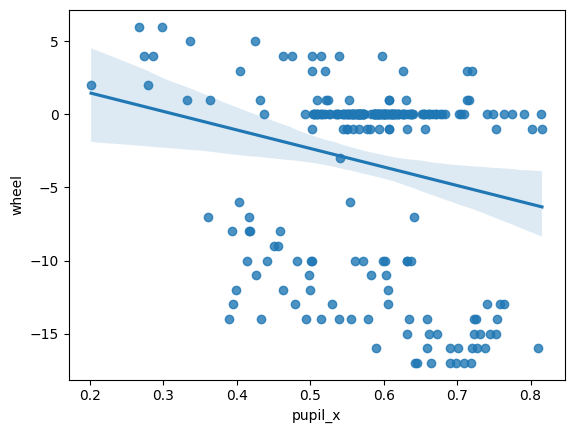

In [5]:
# Select the rows for trial 37 only
df_37 = df[df['trial']==37]

# Use Seaborn's regplot to create a regression plot
sns.regplot(data=df_37, x='pupil_x', y='wheel')

# Use Pingouin to quiantify the correlation between the two variables
pg.corr(df_37['pupil_x'], df_37['wheel'])

Now let's make the same regression plot for trial 11. Do you think there is a correlation between wheel speed and pupil position?

,n,r,CI95%,p-val,BF10,power
pearson,250,-0.083587,"[-0.21, 0.04]",0.187733,0.188,0.261241


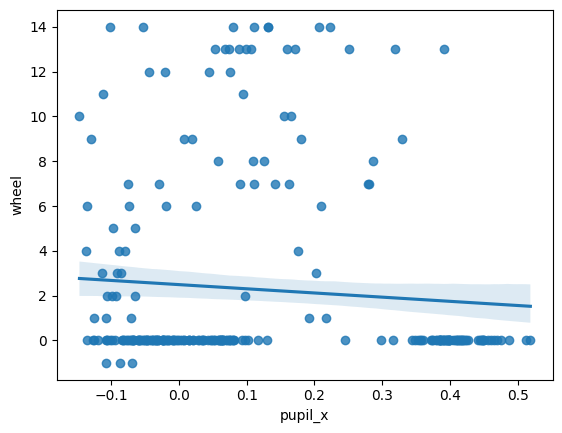

In [6]:
dd = df[df['trial']==11]
sns.regplot(data=dd, x='pupil_x', y='wheel')
pg.corr(dd['pupil_x'], dd['wheel'])

Is there some relationship between the x position and the y position of the pupil, say in trial 13?

,n,r,CI95%,p-val,BF10,power
pearson,250,-0.002767,"[-0.13, 0.12]",0.965283,0.079,0.050153


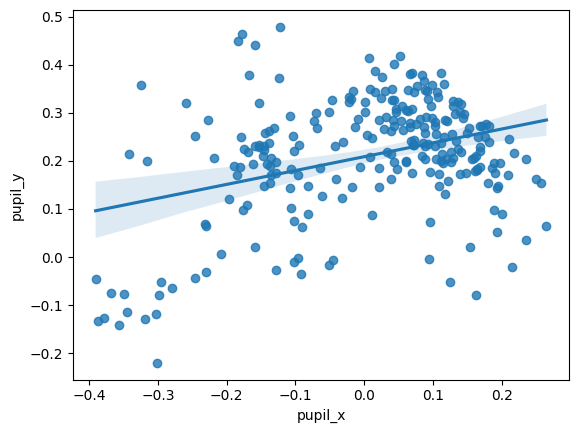

In [7]:
dd = df[df['trial']==13]
sns.regplot(data=dd, x='pupil_x', y='pupil_y')
pg.corr(dd['pupil_x'], dd['wheel'])

Let's now get some practice changing different aspects of the regression plot.

Create a regression plot between  the above plot but with the color set to black.

,n,r,CI95%,p-val,BF10,power
pearson,250,0.346506,"[0.23, 0.45]",1.838331e-08,5.398e+05,0.999905


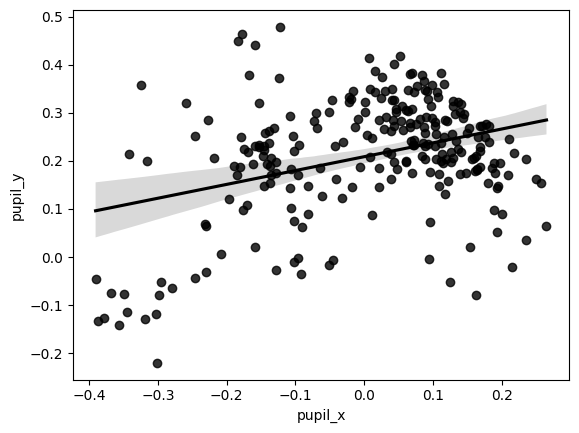

In [8]:
dd = df[df['trial']==13]
sns.regplot(data=dd, x='pupil_x', y='pupil_y', color='black')
pg.corr(dd['pupil_x'], dd['pupil_y'])

Let's make the line stand out. We can control the properties of the line by setting the `line_kws` argument in the `sns.regplot`:

```python
line_properties = {
    'property_1': 'value_1',
    'property_2': 'value_2',
}
sns.regplot(..., line_kws=line_properties)
```

**Example:** Re-create the previous plot with the line in `red` and the points in `black`.


,n,r,CI95%,p-val,BF10,power
pearson,250,0.346506,"[0.23, 0.45]",1.838331e-08,5.398e+05,0.999905


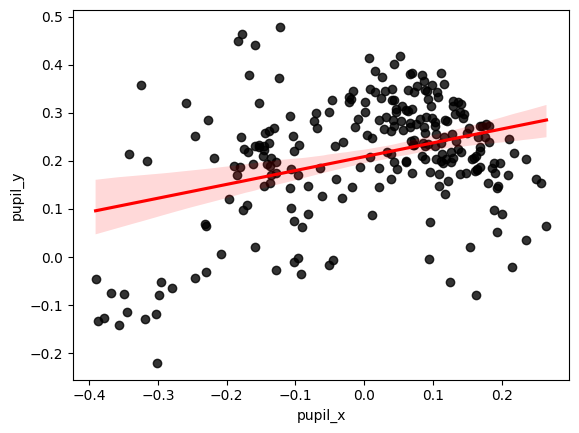

In [9]:
dd = df[df['trial']==13]

line_properties = {
    'color':'red',  # setting the color of the line to red
}
sns.regplot(data=dd, x='pupil_x', y='pupil_y', color='black', line_kws=line_properties)

pg.corr(dd['pupil_x'], dd['pupil_y'])

So far, our regression plot showed us the best linear relationship in the data. What about a nonlinear relationship? Seaborn also allows us to fit polynomials by passing the `order` keyword into `regplot` 🎉

**Example:** Create a regression plot of pupils x and y position in trial 13, with a fit of `order` 2.

,n,r,CI95%,p-val,BF10,power
pearson,250,0.346506,"[0.23, 0.45]",1.838331e-08,5.398e+05,0.999905


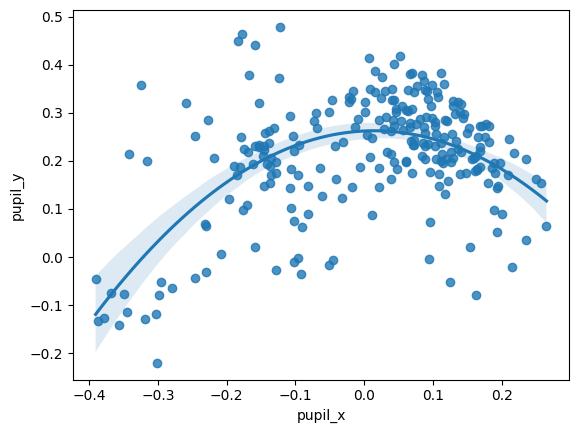

In [10]:
dd = df[df['trial']==13]

sns.regplot(data=dd, x='pupil_x', y='pupil_y', order=2)

pg.corr(dd['pupil_x'], dd['pupil_y'])

Create a regression plot of pupils x and y position in trial 1, with a fit of `order` 2.

,n,r,CI95%,p-val,BF10,power
pearson,250,-0.766441,"[-0.81, -0.71]",1.380848e-49,1.575e+46,1.0


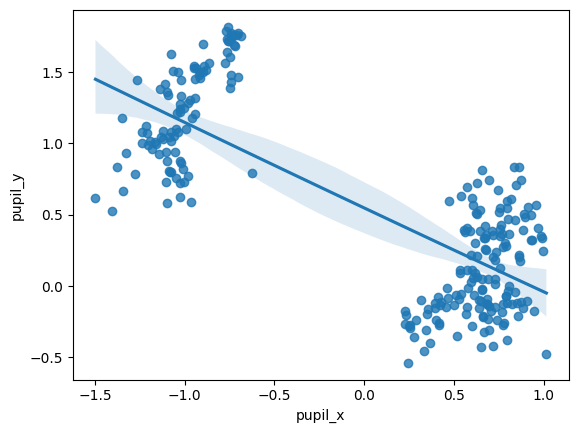

In [27]:
dd = df[df['trial']==1]

sns.regplot(data=dd, x='pupil_x', y='pupil_y', order=2)

pg.corr(dd['pupil_x'], dd['pupil_y'])

Create a regression plot of pupils x and y position in trial 1, with a fit of `order` 3.

,n,r,CI95%,p-val,BF10,power
pearson,250,-0.766441,"[-0.81, -0.71]",1.380848e-49,1.575e+46,1.0


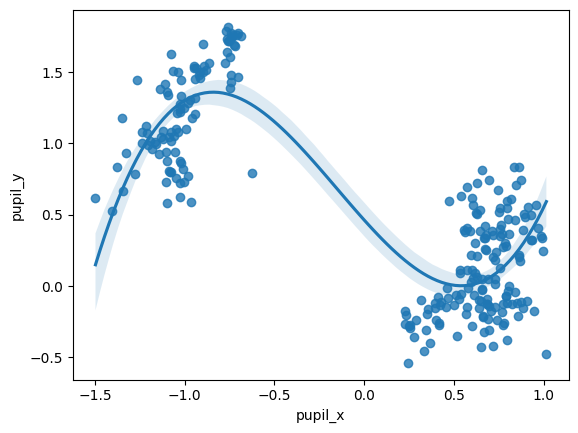

In [30]:
dd = df[df['trial']==1]

sns.regplot(data=dd, x='pupil_x', y='pupil_y', order=3)

pg.corr(dd['pupil_x'], dd['pupil_y'])

While the regression plot is focusing on fitting a line to the data, we can also just visualize the data without a line using Seaborn's `scatterplot`.

**Example:** Make a scatterplot of pupil's x position vs pupil's y position, for trial 11.

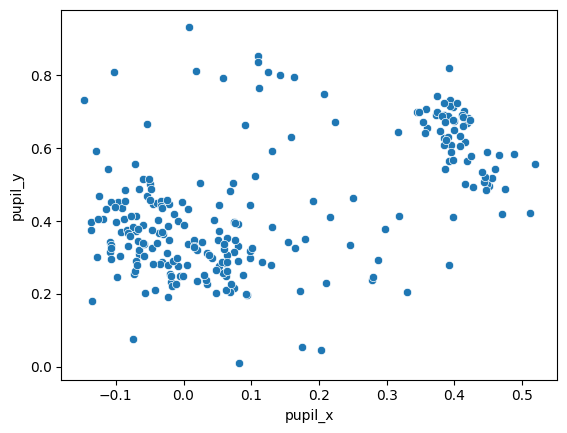

In [31]:
dd = df[df['trial']==11]
sns_plot = sns.scatterplot(data=dd, x='pupil_x', y='pupil_y')

Make a scatterplot of pupil's x position vs pupil's y position, for trial 1.

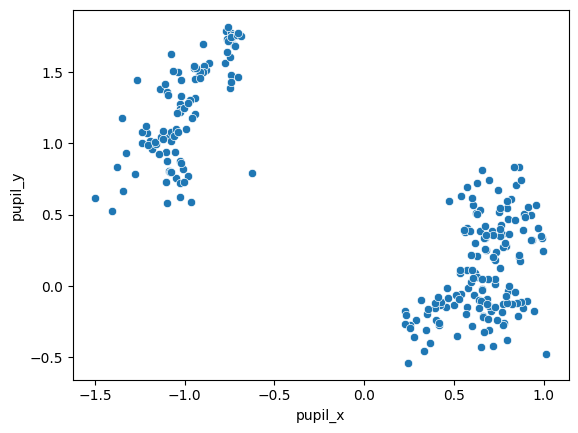

In [33]:
dd = df[df['trial']==1]
sns_plot = sns.scatterplot(data=dd, x='pupil_x', y='pupil_y')

The pupil position in trial 1 has an interesting structure. Could there be some time-dependency here? For instance, is one cloud (or cluster) happening earlier in the trial while the other happens later?

Let's recreate the previous plot, but color the points based on the time, by setting the `hue` argument to `'time'`.

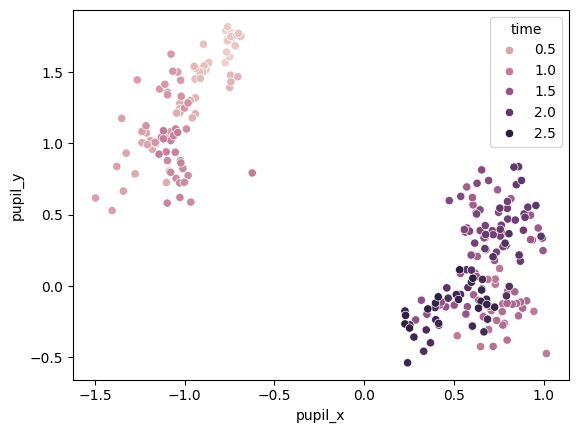

In [34]:
dd = df[df['trial']==1]
sns_plot = sns.scatterplot(data=dd, x='pupil_x', y='pupil_y', hue='time')

Alright, now let's go back to regression plots, but let's bring in some of the categorical variables into the analysis. For example, there could be some relationships between pupil's x and y direction the mouse's response (i.e. right turn, left turn, ro no turn). 

To do this, we can use seaborn's `lmplot` which is very similar to the `regplot`, but allows us to integrate categorical variables in our plotting. 

**Example:** Create a regression plot for pupil's x position vs the y position, for every response type. To do this, we can set the `col` argument of `lmplot` to `"response_type"`.

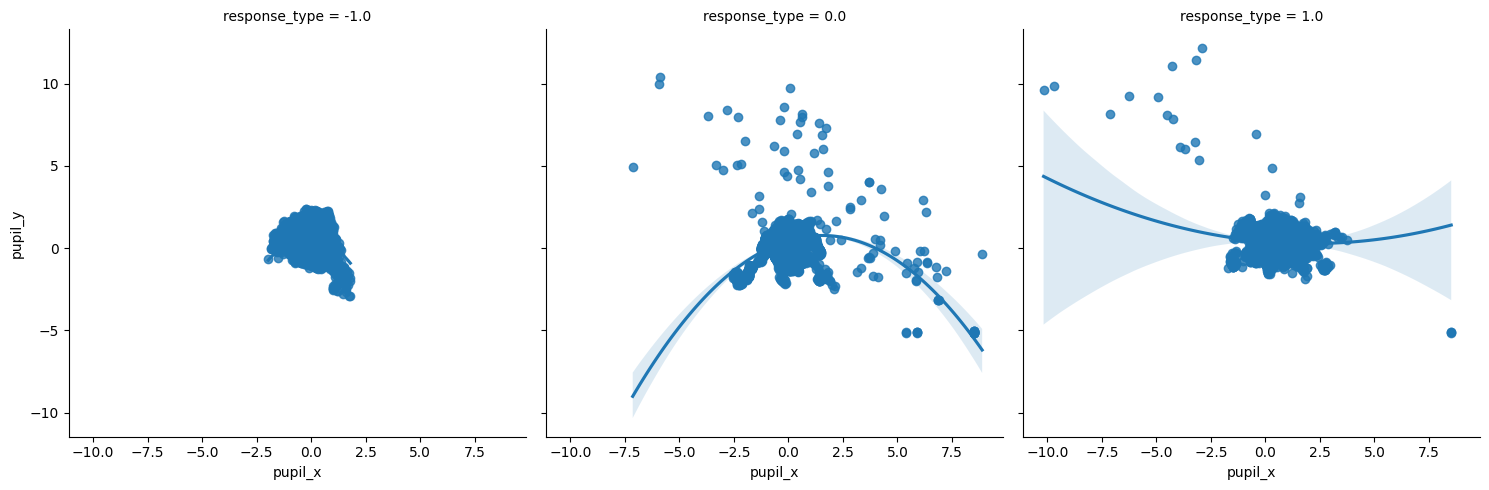

In [44]:
sns.lmplot(data=df, x='pupil_x', y='pupil_y', order=2, col='response_type')

---

## Visualizing and Comparing Two Sets of Data: Histograms and T-test

In data analysis, we often compare measurements, asking questions like "Is the measurement from sample x typically larger than sample y, and by how much?". When we have two sets of data, we can assess whether they are statistically similar and get a qualitative answer using a t-test.

In this section we will make histograms to visualise dsitributions of pupil position and employ the t-test to compare them between trials.

When conducting a t-test, two key values are calculated to interpret the results:

- The `T` value: Indicates the degree of difference between the samples. A T value close to zero implies a high degree of similarity.
- The `p-val`: Evaluates the likelihood that the observed differences are due to chance. A high p-value indicates no significant difference, suggesting the samples may come from the same population.

We will use seaborn to visualize the distribution of our data and  Pingouin to perform the t-test.

**Seaborn**

| Code                                  | Description                                          |
|---------------------------------------|------------------------------------------------------|
| `sns.histplot(data=df, x='column1')`  | Create a histogram for `column1` from DataFrame `df`. |
| `sns.kdeplot(data=df, x='column1')`   | Create a KDE plot for `column1` from DataFrame `df`.  |

**Pingouin**

| Code                          | Description                                               |
|-------------------------------|-----------------------------------------------------------|
| `pg.ttest(data1, data2)`      | Perform a t-test on two datasets `data1` and `data2`.      |

**Exercises**

Let's start by visualizing the distribution of pupil position.

**Example:** Make a histogram of the pupil x positions of trial 50.

<Axes: xlabel='pupil_x', ylabel='Count'>

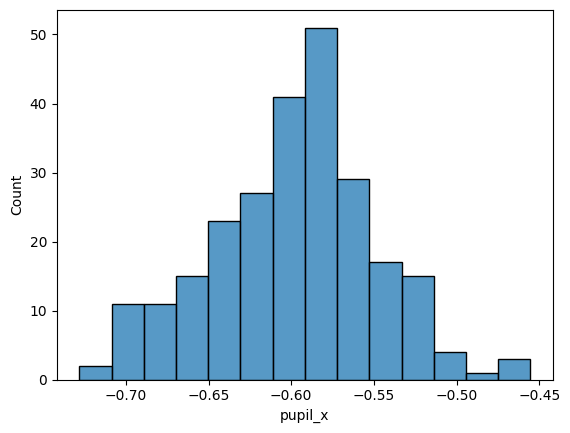

In [46]:
df_50 = df[df['trial']==50]
sns.histplot(data=df_50, x='pupil_x')

Make the same histogram but with `stat` argument set to `"probability"`. What has changed in the plot?

<Axes: xlabel='pupil_x', ylabel='Probability'>

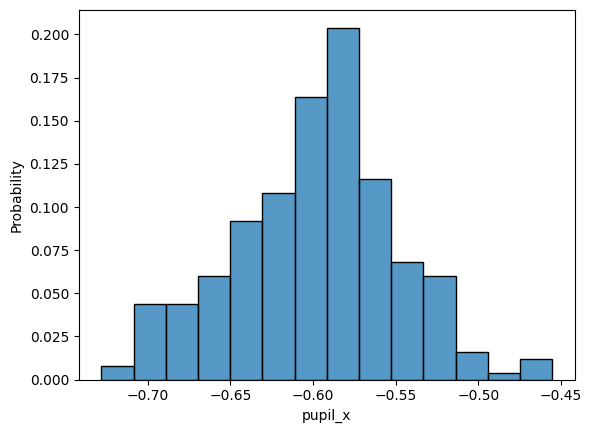

In [47]:
df_50 = df[df['trial']==50]
sns.histplot(data=df_50, x='pupil_x', stat='probability')

We can plot two histograms together by calling the plotting function twice.

**Example:** Make histograms of pupil x positions for trials 9 and 17.

<Axes: xlabel='pupil_x', ylabel='Count'>

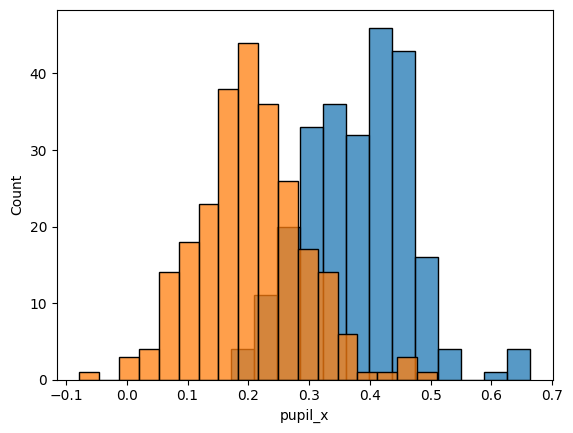

In [84]:
df_9 = df[df['trial']==9]
df_17 = df[df['trial']==17]

sns.histplot(data=df_9, x='pupil_x')
sns.histplot(data=df_17, x='pupil_x')

Make histograms of pupil x positions for trials 12 and 13.

<Axes: xlabel='pupil_x', ylabel='Count'>

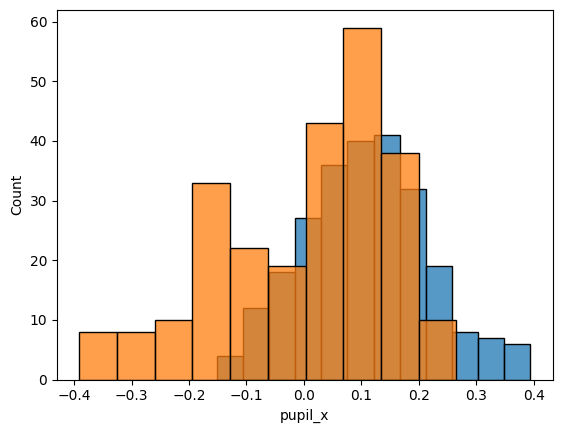

In [83]:
df_12 = df[df['trial']==12]
df_13 = df[df['trial']==13]

sns.histplot(data=df_12, x='pupil_x')
sns.histplot(data=df_13, x='pupil_x')

Now let's compare these two distributions using a t-test.

**Example:** Make histograms of pupil x positions for trials 12 and 13, and perform a t-test using Pingouin's `ttest` function so assess their similarity.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,8.812933,498,two-sided,2.041590e-17,"[0.08, 0.13]",0.788253,2.297e+14,1.0


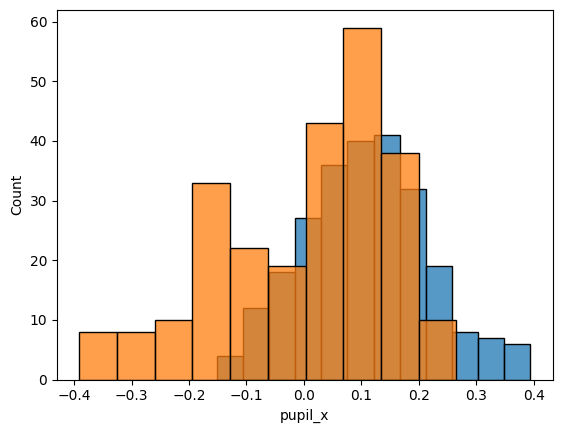

In [86]:
df_12 = df[df['trial']==12]
df_13 = df[df['trial']==13]

sns.histplot(data=df_12, x='pupil_x')
sns.histplot(data=df_13, x='pupil_x')

pg.ttest(df_12['pupil_x'], df_13['pupil_x'])

Do the same analysis for trials 9 and 17.

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-22.68757,498,two-sided,8.746928e-79,"[-0.19, -0.16]",2.029238,8.965e+74,1.0


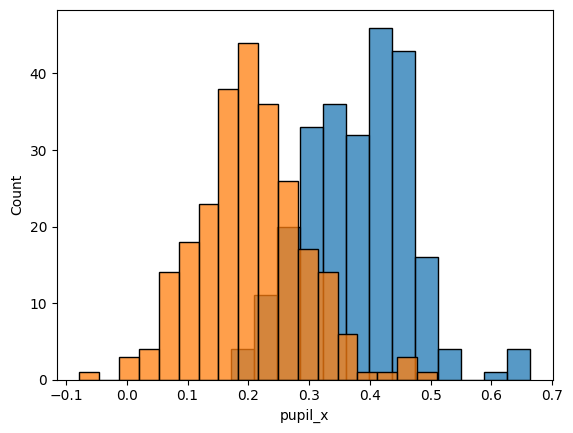

In [88]:
df_9 = df[df['trial']==9]
df_17 = df[df['trial']==17]

sns.histplot(data=df_9, x='pupil_x')
sns.histplot(data=df_17, x='pupil_x')

pg.ttest(df_17['pupil_x'], df_9['pupil_x'])

Do the same analysis for trials 17 and 50.

In [ ]:
df_50 = df[df['trial']==50]
df_17 = df[df['trial']==17]
sns.histplot(data=df_17, x='pupil_x', stat='count')
sns.histplot(data=df_50, x='pupil_x', stat='count')

pg.ttest(df_50['pupil_x'], df_17['pupil_x'])

As a sanity check, let's do a t-test comparing the pupil x positions of trial 50 with itself.

In [ ]:
pg.ttest(df[df.trial==50]['pupil_x'], df[df.trial==50]['pupil_x'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.0,498,two-sided,1.0,"[-0.01, 0.01]",0.0,0.099,0.05


Now, let's explore some of the arguments of the histogram plotting function to refine the visualization. For instance, we can alter the histogram binning by providing several options to `sns.histplot`, for example `binwidth`.

Recreate the plot for trials 9 and 17, but this time setting `binwidth` to 0.01.

<Axes: xlabel='pupil_x', ylabel='Count'>

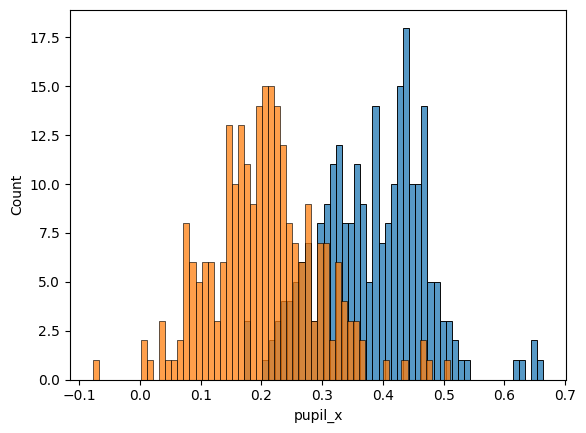

In [117]:
df_9 = df[df['trial']==9]
df_17 = df[df['trial']==17]

sns.histplot(data=df_9, x='pupil_x', binwidth=0.01)
sns.histplot(data=df_17, x='pupil_x', binwidth=0.01)

Let's also give each histogram a specific color of our choosing. Maybe `"darkred"` and `"black"`.<br>
We can do this by setting the `color` argument of the `histplot`.

<Axes: xlabel='pupil_x', ylabel='Count'>

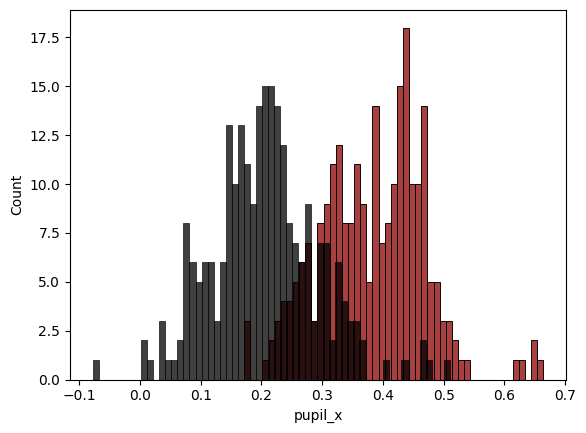

In [113]:
sns.histplot(data=df_9, x='pupil_x', binwidth=0.01, color='darkred')
sns.histplot(data=df_17, x='pupil_x', binwidth=0.01, color='black')

**Example:** Let's label each histogram and give our figure a legend. 

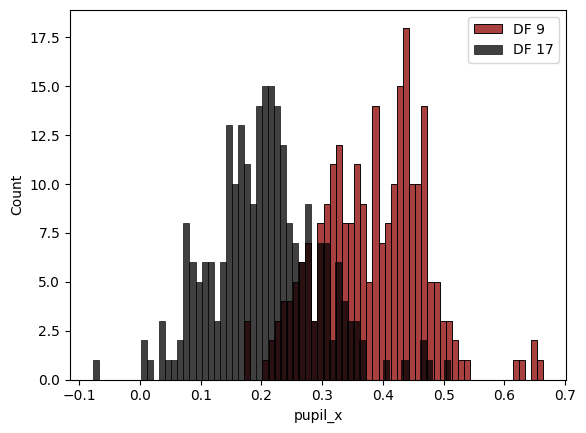

In [120]:
sns.histplot(data=df_9, x='pupil_x', binwidth=0.01, color='darkred', label='DF 9')
sns.histplot(data=df_17, x='pupil_x', binwidth=0.01, color='black', label='DF 17')
plt.legend()

**Note** that to add the legend to the figure we are using `plt.legend()`.<br>
`plt`, which is the name we gave to the Matplotlib package when importing it, is a fantanstic plotting library that allows you to customize your plots in quite some detail. Seaborn is build on top of matplotlib, which is why they can interact with each other.

##### KDE plots
Unlike a histogram that shows frequency through discrete bins, a KDE (Kernel Density Estimate) provides a smooth curve that offers a continuous and clear estimate of the distribution.

Let's add a KDE plot to our existing figure, by setting the `kde` argument to `True`.

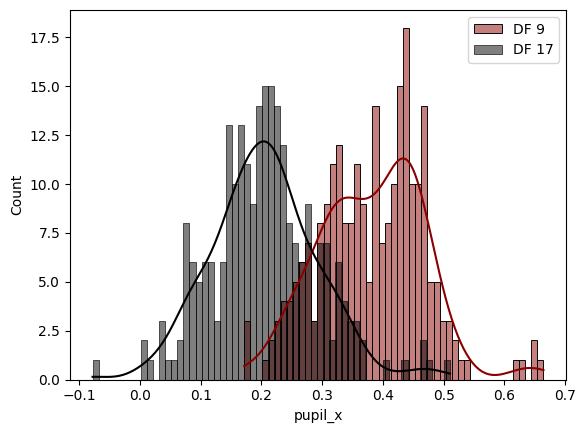

In [119]:
sns.histplot(data=df_9, x='pupil_x', binwidth=0.01, kde=True, color='darkred', label='DF 9')
sns.histplot(data=df_17, x='pupil_x', binwidth=0.01, kde=True, color='black', label='DF 17')
plt.legend()

You can also only have a KDE plot without a histogram by using Seaborn's kde plot. Let's create the same plot as we created in the last step, but without the histogram.

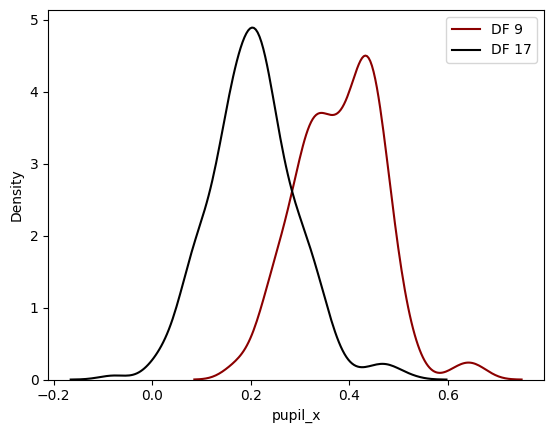

In [118]:
sns.kdeplot(data=df_9, x='pupil_x', color='darkred', label='DF 9')
sns.kdeplot(data=df_17, x='pupil_x', color='black', label='DF 17')
plt.legend()

---

## A Gallery of Plots : 2D Histograms

We have explored histograms in depth, now it's time to take a look at 2D Histograms. 

The seaborn provides the `jointplot` which produces a rich variety of 2D histograms. 

Let's visualise the pupil position data with `jointplot`.


Make a `jointplot` showing the pupil x and y data of trial 13

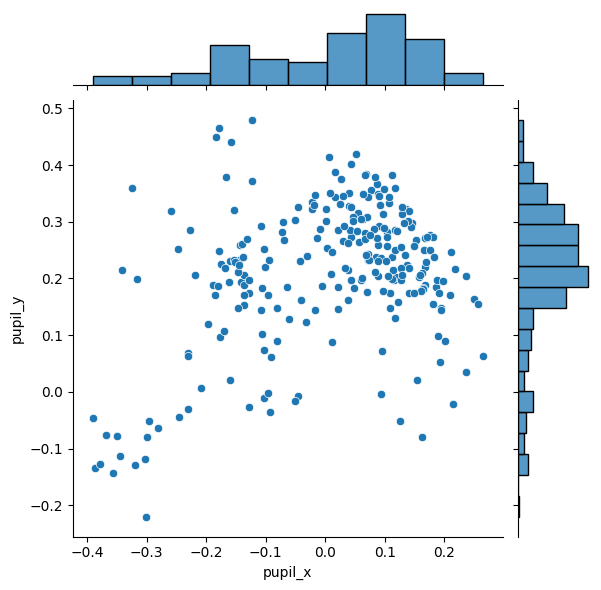

In [57]:
df_13 = df[df['trial']==13]
sns.jointplot(df_13, x="pupil_x", y="pupil_y")

We can split the data according to `response_type` via the `hue` option. 

Make a 2D histogram of the pupil positions for all trials where the data is separated according to `response_type`

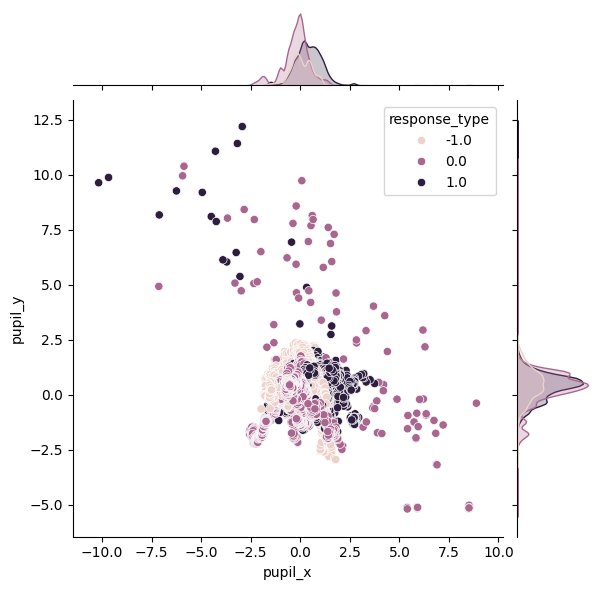

In [58]:
sns.jointplot(df, x="pupil_x", y="pupil_y", hue='response_type')

The type of 2D histogram can be altered by provinding the keyword `kind`

Make a 2D histogram of the pupil positions for trial 13 with `kind='kde'`

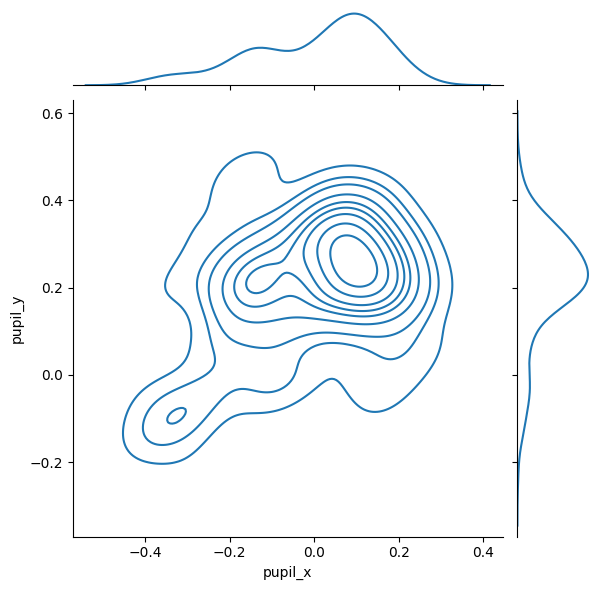

In [59]:
df_13 = df[df['trial']==13]
sns.jointplot(df_13, x="pupil_x", y="pupil_y", kind= 'kde')

Recreate the above plot with `kind='hex'`

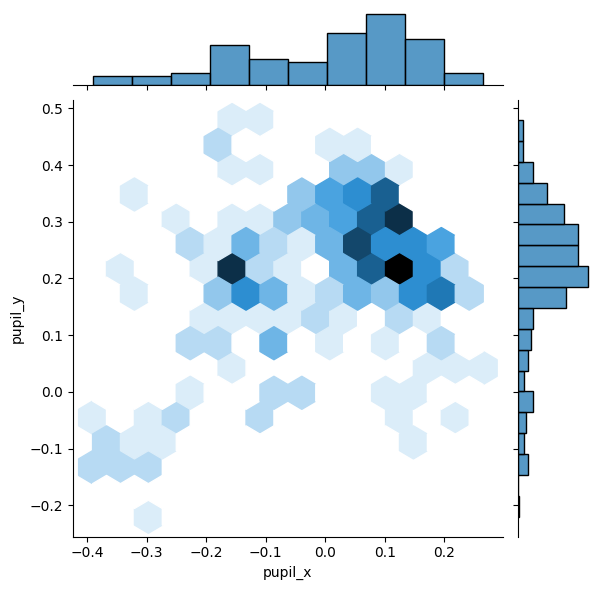

In [60]:
df_13 = df[df['trial']==13]
sns.jointplot(df_13, x="pupil_x", y="pupil_y", kind= 'hex')

Make a final plot with a different `kind`. **Hint** - use `sns.jointplot?` to find out what kinds are available.

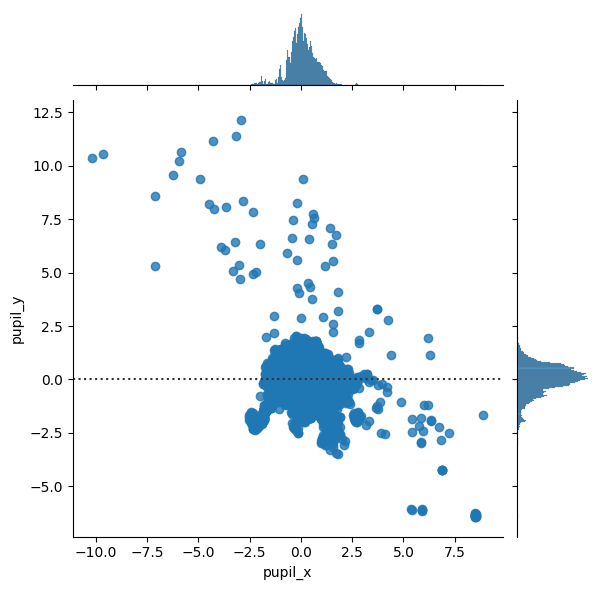

In [61]:
sns.jointplot(df, x="pupil_x", y="pupil_y", kind= 'resid')